In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("electricity_bill_dataset.csv")
df.head(5)

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384.0,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488.0,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416.0,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475.0,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457.0,9.2,4204.4


In [18]:
print(df.info())
print(df.shape)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              13801 non-null  float64
 1   Refrigerator     13801 non-null  float64
 2   AirConditioner   13801 non-null  float64
 3   Television       13801 non-null  float64
 4   Monitor          13801 non-null  float64
 5   MotorPump        13801 non-null  float64
 6   Month            13801 non-null  float64
 7   City             13801 non-null  float64
 8   Company          13801 non-null  float64
 9   MonthlyHours     13800 non-null  float64
 10  TariffRate       13800 non-null  float64
 11  ElectricityBill  13800 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB
None
(13801, 12)
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0


In [20]:
# filling the NaN
df['MonthlyHours'] = df['MonthlyHours'].fillna(df['MonthlyHours'].median())
df['TariffRate'] = df['TariffRate'].fillna(df['TariffRate'].median())
df['ElectricityBill'] = df['ElectricityBill'].fillna(df['ElectricityBill'].median())

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# encoding categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# scaling features
numerical_cols = df.select_dtypes(include=[np.number]).columns
ss = StandardScaler()
df[numerical_cols] = ss.fit_transform(df[numerical_cols])

df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,0.370833,0.769412,0.440988,-1.127227,-0.477801,0.0,1.005408,-0.525870,1.296320,-1.058651,0.048980,-1.002794
1,0.921279,0.163946,0.440988,-1.649603,-0.477801,0.0,-0.441267,1.651347,-0.276776,-0.211050,-0.996060,-0.462331
2,-1.280506,-1.046985,0.440988,-1.127227,1.065228,0.0,0.137403,1.433626,-0.801142,-0.797851,-1.170233,-1.023638
3,-1.280506,0.163946,1.336657,1.484650,-0.477801,0.0,-0.151932,-0.090427,0.352462,-0.317001,1.442365,0.062127
4,-0.546577,0.769412,0.440988,-0.256601,-0.477801,0.0,-1.309271,-0.090427,0.457335,-0.463701,1.442365,-0.091972


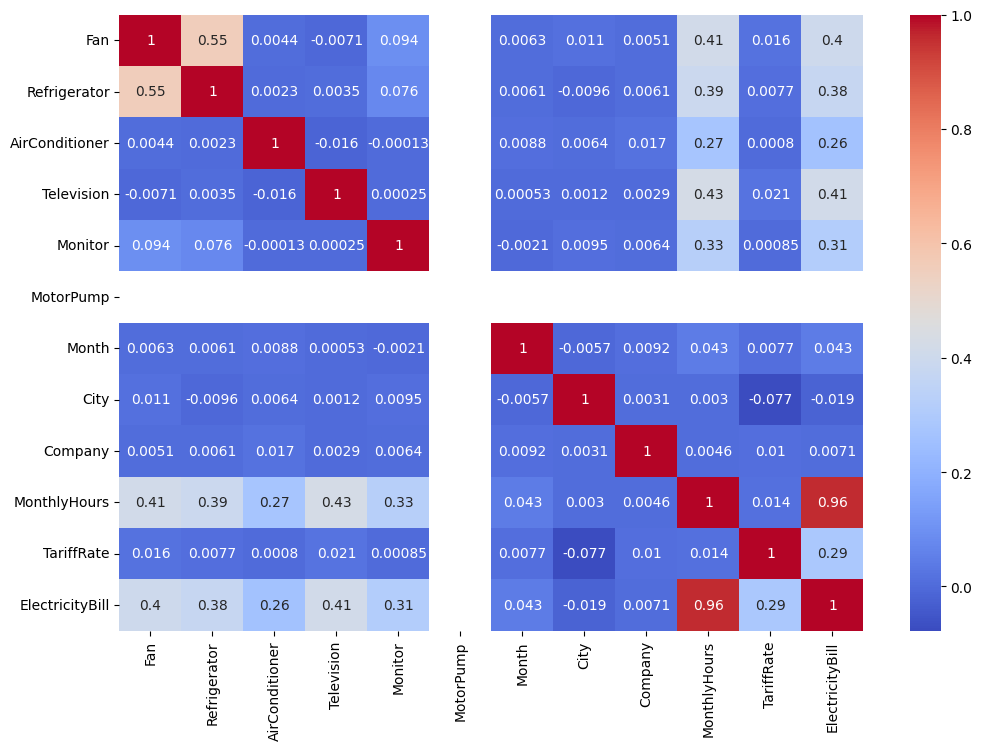

In [22]:
# correlation heatmap (multi collinearity check)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

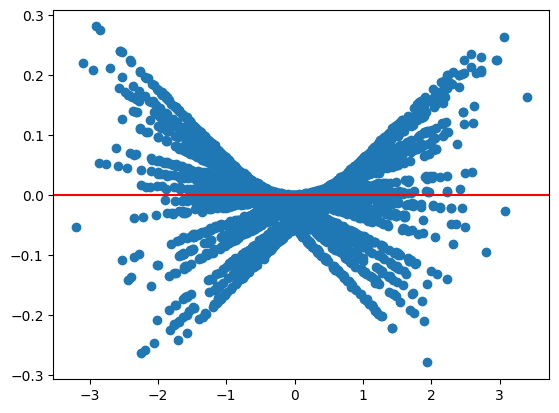

In [24]:
#prepare features
y = df['ElectricityBill']
X = df.drop('ElectricityBill', axis=1)

# Train linear regression
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

ypred = lr.predict(Xtest)

# residual analysis (linearrity + homoscedasticity)
residuals = ytest - ypred
plt.scatter(ypred, residuals)
plt.axhline(0, color='red')
plt.show()

In [ ]:
# linear regression is unreliable because the pattern is not straight line, which fails linearity  and homoscedasticity
# the variance also increases while going away from zero


# Linearity? violated
# homoscedasticity? violated
# independence? Yes
# normality of residuals? pattern suggests non-normality
